In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

# import seaborn as sns
# import seaborn as sns; sns.set(color_codes=True)


In [2]:
!head -n 1 volume_and_excentricity/300.vae

# Void_ID, X_c, Y_c, Z_c, N_particles, R=(abc)^(-1/3), a, b, c, vector_a, vector_b, vector_c 


In [3]:
Voids300 = np.loadtxt("volume_and_excentricity/300.vae", delimiter=",")
Voids200 = np.loadtxt("volume_and_excentricity/200.vae", delimiter=",")
Voids150 = np.loadtxt("volume_and_excentricity/150.vae", delimiter=",")

(-360.0, 360.0)

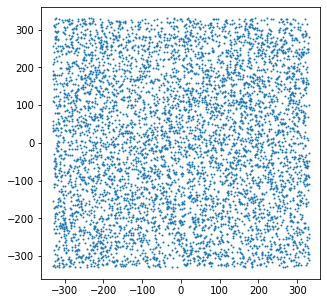

In [4]:
fig = plt.figure(figsize=(5,5))

BoxLength = 720
Trim = 30

halfboxtrim = BoxLength/2 - Trim

index = np.where( 
            (abs(Voids300[:,1]) < halfboxtrim)   & 
            (abs(Voids300[:,2]) < halfboxtrim)   & 
            (abs(Voids300[:,3]) < halfboxtrim) )

plt.scatter( Voids300[index,1], Voids300[index,2], s=1)
plt.xlim(-BoxLength/2, BoxLength/2)
plt.ylim(-BoxLength/2, BoxLength/2)

In [5]:
def TrimCatalog(ellip_cat):
    
    BoxLength = 720
    Trim = 30
    
    halfboxtrim = BoxLength/2 - Trim

    index = np.where( 
            (abs(ellip_cat[:,1]) < halfboxtrim)   & 
            (abs(ellip_cat[:,2]) < halfboxtrim)   & 
            (abs(ellip_cat[:,3]) < halfboxtrim) )
    
    return ellip_cat[index]

In [6]:
voids300 = TrimCatalog(Voids300)
voids200 = TrimCatalog(Voids200)
voids150 = TrimCatalog(Voids150)

In [7]:
void_catalogs = [voids300, voids200, voids150]
labels = ["300 km/s", "200 km/s", "150 km/s"]

ncats = len(void_catalogs)

In [8]:
# Adderman 2017, MNRAS 468 3381 - 3394
# Ellipticity and Prolatness definitions according 
# to BOSS void analysis.

# a = major semi-axis
# c = minor semi-axis


def ellipticity(a,b,c):
    return (1/4.)*((a**2 - c**2) / (a**2 + b**2 + c**2))

def prolatness(a,b,c):
    return(1/4.)*( (b**2-c**2)+(b**2 - a**2)) / (a**2 + b**2 + c**2)


## To do the prolate/oblate scatter plot.
def density_estimation(m1, m2, xmin, xmax, ymin, ymax):
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]                                                     
    positions = np.vstack([X.ravel(), Y.ravel()])                                                       
    values = np.vstack([m1, m2])                                                                        
    kernel = scipy.stats.gaussian_kde(values)                                                                 
    Z = np.reshape(kernel(positions).T, X.shape)
    return X, Y, Z


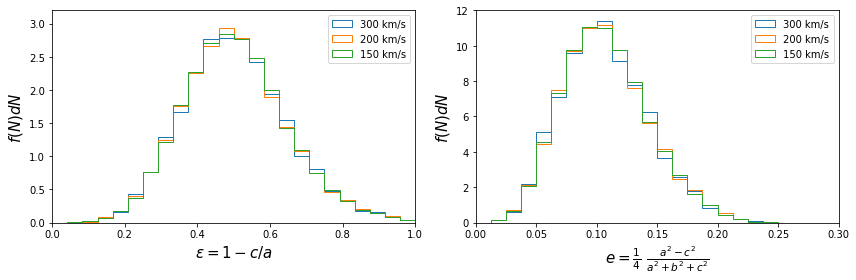

In [9]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(121)

for i in range(ncats):
    a = void_catalogs[i][:,6]
    b = void_catalogs[i][:,7]
    c = void_catalogs[i][:,8]
    e1 = 1 - c/a
    e1_hist, bins, stuff = ax1.hist(e1, bins=np.linspace(0,1,25), 
                                   density=True, histtype="step", label=labels[i])  
plt.legend(loc=0)    
plt.xlim(0,1)
plt.ylim(0,3.2)
plt.ylabel(r"$f(N)dN$", fontsize=15)
plt.xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)

ax2 = fig.add_subplot(122)
for i in range(ncats):
    a = void_catalogs[i][:,6]
    b = void_catalogs[i][:,7]
    c = void_catalogs[i][:,8]
    e2 = ellipticity(a,b,c)
    e2_hist, bins, stuff = ax2.hist(e2, bins=np.linspace(0,0.3,25), 
                               density=True, histtype="step", label=labels[i])

    
plt.legend(loc=0)    
plt.xlim(0,0.3)
plt.ylim(0,12)
plt.ylabel(r"$f(N)dN$", fontsize=15)
plt.xlabel(r"$e = \frac{1}{4}\mathrm{\ }\frac{a^2 -c^2}{a^2 + b^2 + c^2}$", fontsize=15)


plt.tight_layout()

plt.savefig("figures/2eccentricity_different_velocities.pdf")


[0.08199045 0.1045521  0.13057089] [-0.06589956 -0.03158957  0.0005506 ]
[0.08183587 0.10492922 0.13056591] [-0.0675635  -0.03248546 -0.00010634]
[0.08203098 0.10498896 0.13037339] [-0.06742442 -0.03177554  0.00027004]


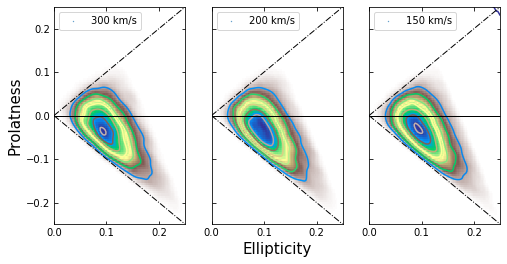

In [13]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax = [ax1, ax2, ax3]

unity = np.array([0,0.25])

ax1.set_ylabel("Prolatness", fontsize=15)

for i in range(ncats):
    a = void_catalogs[i][:,6]
    b = void_catalogs[i][:,7]
    c = void_catalogs[i][:,8]
    
    e = ellipticity(a,b,c)
    p = prolatness(a,b,c)
    
    print(np.percentile(e, [25, 50, 75]), np.percentile(p, [25, 50, 75]))

    xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25
    X, Y, Z = density_estimation(e, p, xmin, xmax, ymin, ymax)
    
    ax[i].imshow(np.rot90(Z), 
                 cmap=plt.cm.terrain_r, 
                 extent=[xmin, xmax, ymin, ymax], 
                 aspect='auto')
    #plt.colorbar()
    # Add contour lines
    ax[i].contour(X, Y, Z, cmap="terrain")       
    
    #if(i==0):
    #    ax[0].scatter(e,p, s=0.1, label=labels[i])
    #else:
    ax[i].scatter(0,0, s=0.1, label=labels[i])
    
    ax[i].plot(unity,  unity, linestyle="-.", color="k", lw=1)
    ax[i].plot(unity, -unity, linestyle="-.", color="k", lw=1)
    ax[i].axhline(0, color="k", lw=1)
    
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].legend(loc=0)    
    if(i==1):
        ax2.set_xlabel("Ellipticity", fontsize=15)
    ax[i].tick_params(axis="x",   top=True, direction="in")
    ax[i].tick_params(axis="y", right=True, direction="in")
    
    ax[i].set_xticks([0,0.1,0.2])
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax1.set_xticklabels(["0.0", "0.1", "0.2"])

plt.savefig("figures/ellipticity_vs_prolatness.pdf")

In [14]:
Volume = (BoxLength - Trim) ** 3
print(Volume)

328509000


# Density Volume Plot 

Text(0.5, 0, '$R$ (Mpc/h)')

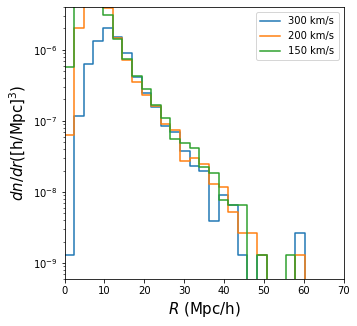

In [15]:
fig   = plt.figure(figsize=(5,5))

NBINS = 30
R_min = 0
R_max = 70

BINS  = np.linspace(R_min, R_max, NBINS)
Bin_width = (BINS[-1] - BINS[0]) / NBINS

Bins_plt = []
for h in range(NBINS -1):
    Bins_plt.extend([BINS[h], BINS[h+1]])

bins_c = []
for j in range(NBINS-1):
    bins_c.append((BINS[j+1] + BINS[j]) / 2)
bins_c = np.array(bins_c)

ncats = len(void_catalogs)

for i in range(ncats):
    R = void_catalogs[i][:,5]
    R_hist, bin_edges = np.histogram(R, bins=BINS)
    
    R_hist = R_hist / (Volume * Bin_width)
    
    R_hisplt = [R_hist[0]]
    for h in range(NBINS - 2):
        R_hisplt.extend([R_hist[h], R_hist[h+1]])
    R_hisplt.append(R_hist[-1])
    
    plt.plot(Bins_plt, R_hisplt, label=labels[i])
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)
    
plt.legend(loc=0)    
plt.xlim(R_min, R_max)
plt.ylim(6e-10,4e-6)
plt.yscale("log")
plt.ylabel(r"$ dn / dr (\mathrm{ [h/Mpc]}^3)$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)


In [19]:
R_cut = 9 # Mpc/h

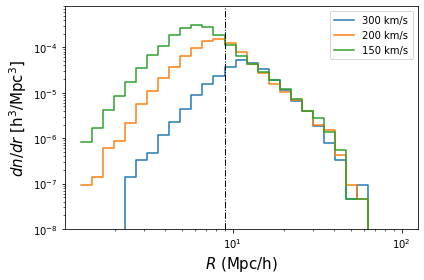

In [20]:
fig   = plt.figure(figsize=(6,4))

NBINS = 30

lnR_min = 0.1
lnR_max = 2.0


BINS  = np.linspace(lnR_min, lnR_max, NBINS)
Bin_width = (BINS[1] - BINS[0])

# Bins Edges array to plot steps.
X = []
for h in range(NBINS -1):
    X.extend([BINS[h], BINS[h+1]])
X = np.array(X)
    
# Bins centers
Bins_c = (BINS[:-1] + BINS[1:])/2


ncats = len(void_catalogs)

for i in range(ncats):
    R = void_catalogs[i][:,5]
    log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
    
    log10R_hist = log10R_hist / (Volume * Bin_width)
    
    Y = [log10R_hist[0]]
    for h in range(NBINS - 2):
        Y.extend([log10R_hist[h], log10R_hist[h+1]])
    Y.append(log10R_hist[-1])
    
    plt.plot(10**X, Y, label=labels[i])
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)

    
plt.axvline(R_cut, c="k", linewidth=1, linestyle="-.")    
plt.legend(loc=0)    
#plt.xlim(lnR_min, lnR_max)
plt.ylim(1e-8,8e-4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
plt.tight_layout()

plt.savefig("figures/void_size_function.pdf")

Check this paper:

http://inspirehep.net/record/1421620/plots

Testing cosmology with a catalogue of voids in the BOSS galaxy surveys - Nadathur, Seshadri Mon.Not.Roy.Astron.Soc. 461 (2016) no.1, 358-370 arXiv:1602.04752 [astro-ph.CO]


In [21]:
voids300_c = voids300[np.where(voids300[:,5] > R_cut)]
voids200_c = voids200[np.where(voids200[:,5] > R_cut)]
voids150_c = voids150[np.where(voids150[:,5] > R_cut)]

void_catalogs_cut = [voids300_c, voids200_c, voids150_c]

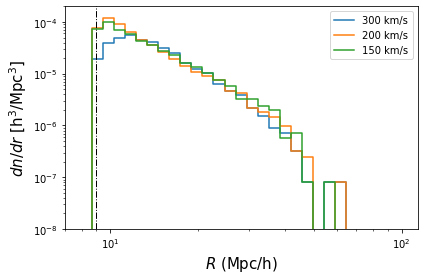

In [26]:
fig   = plt.figure(figsize=(6,4))

NBINS = 30

lnR_min = 0.9
lnR_max = 2.0


BINS  = np.linspace(lnR_min, lnR_max, NBINS)
Bin_width = (BINS[1] - BINS[0])

# Bins Edges array to plot steps.
X = []
for h in range(NBINS -1):
    X.extend([BINS[h], BINS[h+1]])
X = np.array(X)
    
# Bins centers
Bins_c = (BINS[:-1] + BINS[1:])/2


ncats = len(void_catalogs)

for i in range(ncats):
    R = void_catalogs_cut[i][:,5]
    log10R_hist, bin_edges = np.histogram( np.log10(R), bins=BINS)
    
    log10R_hist = log10R_hist / (Volume * Bin_width)
    
    Y = [log10R_hist[0]]
    for h in range(NBINS - 2):
        Y.extend([log10R_hist[h], log10R_hist[h+1]])
    Y.append(log10R_hist[-1])
    
    plt.plot(10**X, Y, label=labels[i])
    #plt.fill_between(Bins_plt, 1e-12, R_hisplt, label=labels[i], alpha=0.5)
    
plt.legend(loc=0)  
plt.axvline(R_cut, c="k", linewidth=1, linestyle="-.")    
#plt.xlim(lnR_min, lnR_max)
plt.ylim(1e-8,2e-4)
plt.yscale("log")
plt.xscale("log")
plt.ylabel(r"$ dn / dr \mathrm{\ [h^3 / Mpc^3]}$", fontsize=15)
plt.xlabel(r"$R$ (Mpc/h)", fontsize=15)
plt.tight_layout()

plt.savefig("figures/void_size_function_R_min_cut.pdf")

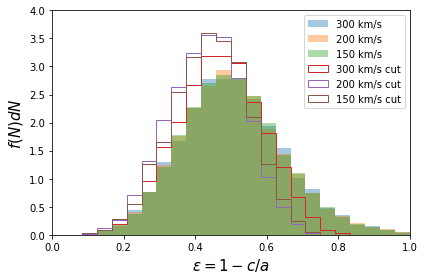

In [28]:
fig = plt.figure(figsize=(6,4))

for i in range(ncats):
    c = void_catalogs[i][:,8]
    a = void_catalogs[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = plt.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="stepfilled", alpha=0.4, label=labels[i])

labels_cut = ["300 km/s cut", "200 km/s cut", "150 km/s cut"]
    
for i in range(ncats):
    c = void_catalogs_cut[i][:,8]
    a = void_catalogs_cut[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = plt.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="step", label=labels_cut[i])    
    
plt.legend(loc=0)    
plt.xlim(0,1)
plt.ylim(0,4)
plt.ylabel(r"$f(N)dN$", fontsize=15)
plt.xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)

plt.tight_layout()
plt.savefig("figures/ellipticity_combined.pdf")

300 km/s 0.5042377387924983 +/- 0.14347335891905436
200 km/s 0.5041512097835235 +/- 0.14360357900877257
150 km/s 0.504396707946565 +/- 0.14267912040933095
300 km/s cut 0.4674814992173103 +/- 0.11947706018894354
200 km/s cut 0.43260401077152894 +/- 0.1061685444455219
150 km/s cut 0.44194519824440476 +/- 0.10712389265653156


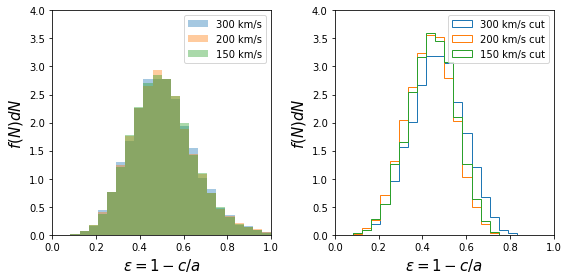

In [45]:
fig = plt.figure(figsize=(8,4))

ax1 = fig.add_subplot(121)
for i in range(ncats):
    c = void_catalogs[i][:,8]
    a = void_catalogs[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = ax1.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="stepfilled", alpha=0.4, label=labels[i])

    print(labels[i], e.mean(),"+/-", e.std())
    
ax1.legend(loc=0)    
ax1.set_xlim(0,1)
ax1.set_ylim(0,4)
ax1.set_ylabel(r"$f(N)dN$", fontsize=15)
ax1.set_xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)    
    
ax2 = fig.add_subplot(122)    
for i in range(ncats):
    c = void_catalogs_cut[i][:,8]
    a = void_catalogs_cut[i][:,6]
    
    e = 1 - c/a
    
    e_hist, bins, stuff = ax2.hist(e, bins=np.linspace(0,1,25), 
                                   density=True, histtype="step", label=labels_cut[i])    
    
    print(labels_cut[i], e.mean(),"+/-", e.std())

ax2.legend(loc=0)    
ax2.set_xlim(0,1)
ax2.set_ylim(0,4)
ax2.set_ylabel(r"$f(N)dN$", fontsize=15)
ax2.set_xlabel(r"$\epsilon = 1 - c/a$", fontsize=15)
plt.tight_layout()
plt.savefig("figures/ellipticity_combined_1.pdf")

In [30]:
def plot_prolatness(cat, filename="0"):
    a = cat[:,6]
    b = cat[:,7]
    c = cat[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)
    plt.tight_layout()
    #plt.savefig(FG_path + "void_two_axis_ratios_{}.{}".format(FILENUM, FG_format))
    #plt.close()


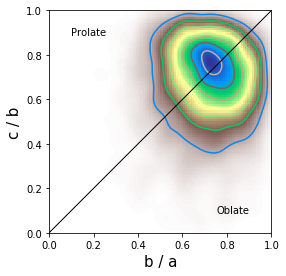

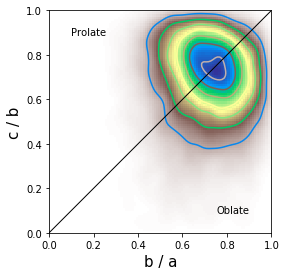

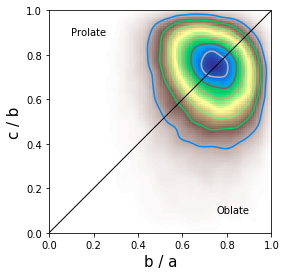

In [31]:
plot_prolatness(voids300)
plt.savefig("figures/prolatness_voids300.pdf")
plot_prolatness(voids200)
plt.savefig("figures/prolatness_voids200.pdf")
plot_prolatness(voids150)
plt.savefig("figures/prolatness_voids150.pdf")

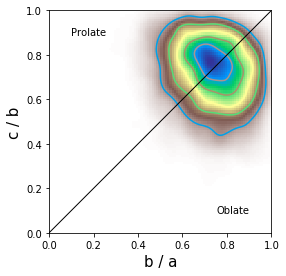

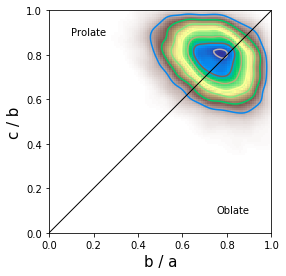

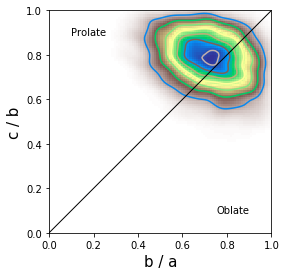

In [32]:
plot_prolatness(voids300_c)
plt.savefig("figures/prolatness_voids300_cut.pdf")
plot_prolatness(voids200_c)
plt.savefig("figures/prolatness_voids200_cut.pdf")
plot_prolatness(voids150_c)
plt.savefig("figures/prolatness_voids150_cut.pdf")

# Using SCIPY STATS GAUSSIAN_KDE


a = voids300_c[:,6]
b = voids300_c[:,7]
c = voids300_c[:,8]

m1, m2 = b/a, c/b

data = np.vstack((m1,m2))

xmin, xmax = 0, 1
ymin, ymax = 0, 1

kde = scipy.stats.gaussian_kde(data)

xx, yy = np.mgrid[-3:3:.01, -1:4:.01]
density = kde(np.c_[xx.flat, yy.flat].T).reshape(xx.shape)

f, ax = plt.subplots()
cset = ax.contourf(xx, yy, density, cmap="viridis")
f.colorbar(cset)

plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

In [33]:
def plot_two_prolatness(cat1, cat2 , filename="0"):
    a = cat1[:,6]
    b = cat1[:,7]
    c = cat1[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(121)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)

    
    
    a = cat2[:,6]
    b = cat2[:,7]
    c = cat2[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax = fig.add_subplot(122)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)
    plt.tight_layout()

    #plt.close()


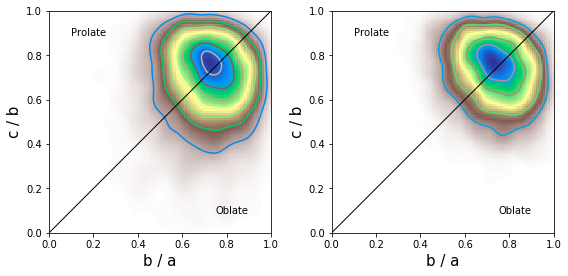

In [34]:
plot_two_prolatness(voids300, voids300_c)

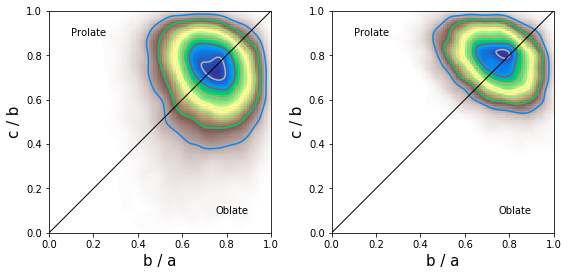

In [35]:
plot_two_prolatness(voids200, voids200_c)

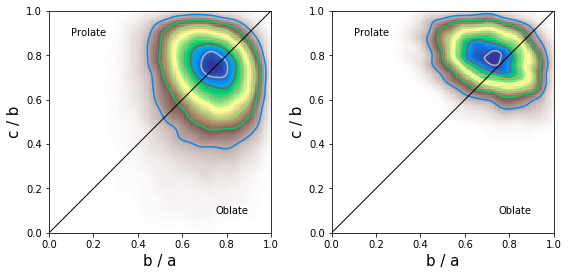

In [36]:
plot_two_prolatness(voids150, voids150_c)

In [37]:
def plot_three_prolatness(cat1, cat2, cat3 , filename="0"):
    fig = plt.figure(figsize=(12,4))
    
    a = cat1[:,6]
    b = cat1[:,7]
    c = cat1[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)
    
    ax = fig.add_subplot(131)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)

    
    
    a = cat2[:,6]
    b = cat2[:,7]
    c = cat2[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax = fig.add_subplot(132)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)
    
    
        
    a = cat3[:,6]
    b = cat3[:,7]
    c = cat3[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax = fig.add_subplot(133)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)
    plt.tight_layout()

    #plt.close()

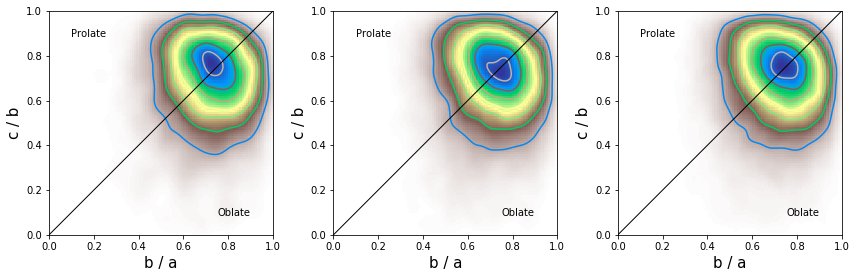

In [38]:
plot_three_prolatness(voids300, voids200, voids150)

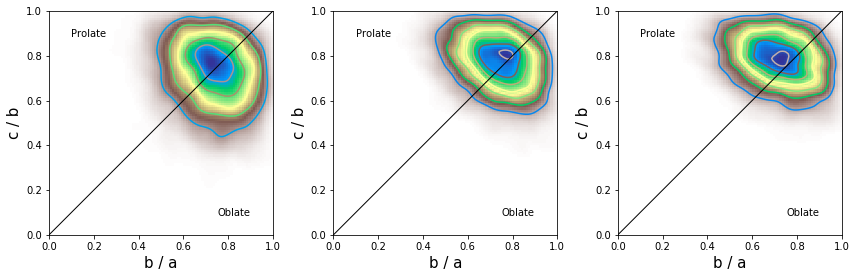

In [39]:
plot_three_prolatness(voids300_c, voids200_c, voids150_c)

In [43]:
def plot_six_prolatness(cat1, cat2, cat3, cat4, cat5, cat6, filename="0"):
    fig = plt.figure(figsize=(12,8))
    
    a = cat1[:,6]
    b = cat1[:,7]
    c = cat1[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1
    
    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)
    
    ax1 = fig.add_subplot(231)            
    ax1.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    ax1.contour(X, Y, Z, cmap="terrain")                                                                           
    unitary = np.linspace(0,1)
    ax1.plot(unitary, unitary, c="k", linewidth=1)
    
    ax1.set_xlim([xmin, xmax])                                                                           
    ax1.set_ylim([ymin, ymax])                                                                           

    ax1.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax1.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    #plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)

    values = "{:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f}".format(
    np.percentile(m1,25), np.percentile(m1,50), np.percentile(m1,75), 
    np.percentile(m2,25), np.percentile(m2,50), np.percentile(m2,75))
    
    print(values)
    
    
    
    a = cat2[:,6]
    b = cat2[:,7]
    c = cat2[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax2 = fig.add_subplot(232, sharey = ax1)            
    ax2.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    ax2.contour(X, Y, Z, cmap="terrain")                                                                           
    ax2.plot(unitary, unitary, c="k", linewidth=1)
    
    ax2.set_xlim([xmin, xmax])
    ax2.set_ylim([ymin, ymax]) 
    ax2.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax2.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    #plt.xlabel("b / a", fontsize=15)
    #plt.ylabel("c / b", fontsize=15)
    values = "{:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f}".format(
    np.percentile(m1,25), np.percentile(m1,50), np.percentile(m1,75), 
    np.percentile(m2,25), np.percentile(m2,50), np.percentile(m2,75))
    
    print(values)
    
    
        
    a = cat3[:,6]
    b = cat3[:,7]
    c = cat3[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax = fig.add_subplot(233)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    #plt.xlabel("b / a", fontsize=15)
    #plt.ylabel("c / b", fontsize=15)
    values = "{:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f}".format(
    np.percentile(m1,25), np.percentile(m1,50), np.percentile(m1,75), 
    np.percentile(m2,25), np.percentile(m2,50), np.percentile(m2,75))
    
    print(values)
    
    
    
    a = cat4[:,6]
    b = cat4[:,7]
    c = cat4[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)
    
    ax = fig.add_subplot(234)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    plt.ylabel("c / b", fontsize=15)

    values = "{:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f}".format(
    np.percentile(m1,25), np.percentile(m1,50), np.percentile(m1,75), 
    np.percentile(m2,25), np.percentile(m2,50), np.percentile(m2,75))
    
    print(values)
    
    
    a = cat5[:,6]
    b = cat5[:,7]
    c = cat5[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax = fig.add_subplot(235)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    #plt.ylabel("c / b", fontsize=15)
    values = "{:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f}".format(
    np.percentile(m1,25), np.percentile(m1,50), np.percentile(m1,75), 
    np.percentile(m2,25), np.percentile(m2,50), np.percentile(m2,75))
    
    print(values)
    
    
        
    a = cat6[:,6]
    b = cat6[:,7]
    c = cat6[:,8]

    m1, m2 = b/a, c/b
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1

    X, Y, Z = density_estimation(m1, m2, xmin, xmax, ymin, ymax)

    ax = fig.add_subplot(236)            
    # Show density 
    ax.imshow(np.rot90(Z), cmap=plt.cm.terrain_r, extent=[xmin, xmax, ymin, ymax])
    #plt.colorbar()
    # Add contour lines
    plt.contour(X, Y, Z, cmap="terrain")                                                                           
    #ax.plot(m1, m2, 'k.', markersize=0.1) 
    unitary = np.linspace(0,1)
    ax.plot(unitary, unitary, c="k", linewidth=1)
    

    ax.set_xlim([xmin, xmax])                                                                           
    ax.set_ylim([ymin, ymax])                                                                           

    ax.text(0.9, 0.1,  "Oblate", horizontalalignment="right", verticalalignment="center" )
    ax.text(0.1, 0.9, "Prolate", horizontalalignment="left", verticalalignment="center" )

    plt.xlabel("b / a", fontsize=15)
    #plt.ylabel("c / b", fontsize=15)

    values = "{:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f} & {:04.3f}".format(
    np.percentile(m1,25), np.percentile(m1,50), np.percentile(m1,75), 
    np.percentile(m2,25), np.percentile(m2,50), np.percentile(m2,75))
    
    print(values)
    
    plt.subplots_adjust(wspace = -.059)
    
    plt.tight_layout()

    #plt.close()

0.629 & 0.725 & 0.814 & 0.596 & 0.713 & 0.813
0.626 & 0.722 & 0.813 & 0.603 & 0.718 & 0.816
0.627 & 0.724 & 0.814 & 0.601 & 0.718 & 0.814
0.651 & 0.740 & 0.824 & 0.642 & 0.740 & 0.827
0.655 & 0.745 & 0.827 & 0.703 & 0.782 & 0.853
0.624 & 0.719 & 0.808 & 0.719 & 0.791 & 0.860


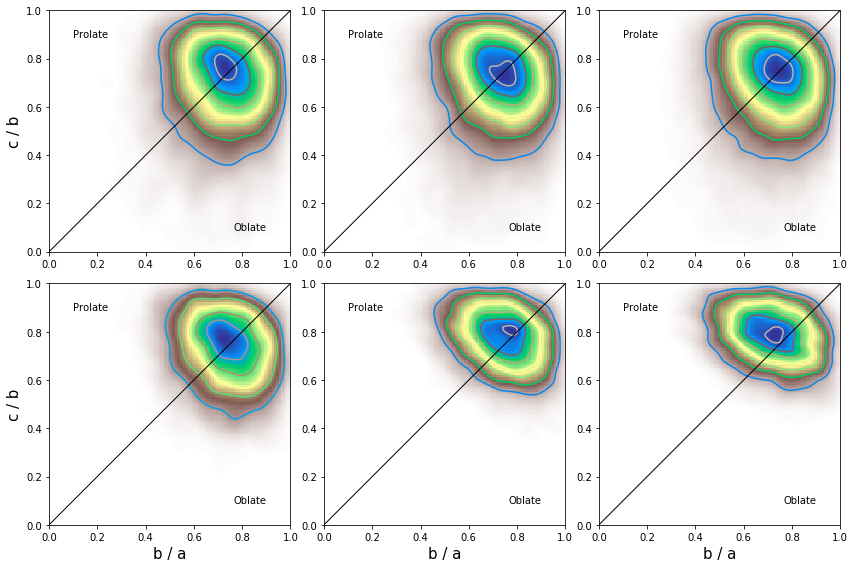

In [46]:
plot_six_prolatness(voids300, voids200, voids150, voids300_c, voids200_c, voids150_c)
plt.savefig("figures/prolatness_merged.pdf")

[0.07690743 0.09774344 0.11928982] [-0.05985377 -0.02865137  0.00175232]
[0.07131854 0.09074042 0.11068389] [-0.06166932 -0.0307557  -0.00283202]
[0.07412662 0.09406552 0.11601711] [-0.0728229  -0.0401917  -0.00961643]


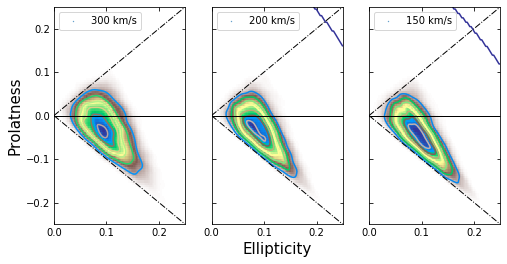

In [42]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax = [ax1, ax2, ax3]

unity = np.array([0,0.25])

ax1.set_ylabel("Prolatness", fontsize=15)

for i in range(ncats):
    a = void_catalogs_cut[i][:,6]
    b = void_catalogs_cut[i][:,7]
    c = void_catalogs_cut[i][:,8]
    
    e = ellipticity(a,b,c)
    p = prolatness(a,b,c)
    
    print(np.percentile(e, [25, 50, 75]), np.percentile(p, [25, 50, 75]))

    xmin, xmax, ymin, ymax =  0, 0.25, -0.25, 0.25
    X, Y, Z = density_estimation(e, p, xmin, xmax, ymin, ymax)
    
    ax[i].imshow(np.rot90(Z), 
                 cmap=plt.cm.terrain_r, 
                 extent=[xmin, xmax, ymin, ymax], 
                 aspect='auto')
    #plt.colorbar()
    # Add contour lines
    ax[i].contour(X, Y, Z, cmap="terrain")       
    
    #if(i==0):
    #    ax[0].scatter(e,p, s=0.1, label=labels[i])
    #else:
    ax[i].scatter(0,0, s=0.1, label=labels[i])
    
    ax[i].plot(unity,  unity, linestyle="-.", color="k", lw=1)
    ax[i].plot(unity, -unity, linestyle="-.", color="k", lw=1)
    ax[i].axhline(0, color="k", lw=1)
    
    ax[i].set_xlim(xmin, xmax)
    ax[i].set_ylim(ymin, ymax)
    ax[i].legend(loc=0)    
    if(i==1):
        ax2.set_xlabel("Ellipticity", fontsize=15)
    ax[i].tick_params(axis="x",   top=True, direction="in")
    ax[i].tick_params(axis="y", right=True, direction="in")
    
    ax[i].set_xticks([0,0.1,0.2])
    
ax2.set_yticklabels([])
ax3.set_yticklabels([])
ax1.set_xticklabels(["0.0", "0.1", "0.2"])

plt.savefig("figures/ellipticity_vs_prolatness_cut.pdf")